## Handle Missing Value

In [5]:
# Import necessary libraries
import pandas as pd

# Load the dataset
titanic_df = pd.read_csv('./titanic.csv')

# Display the first 5 rows of the dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Get basic information about the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Get summary statistics for numerical columns
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Check for missing values in each column
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

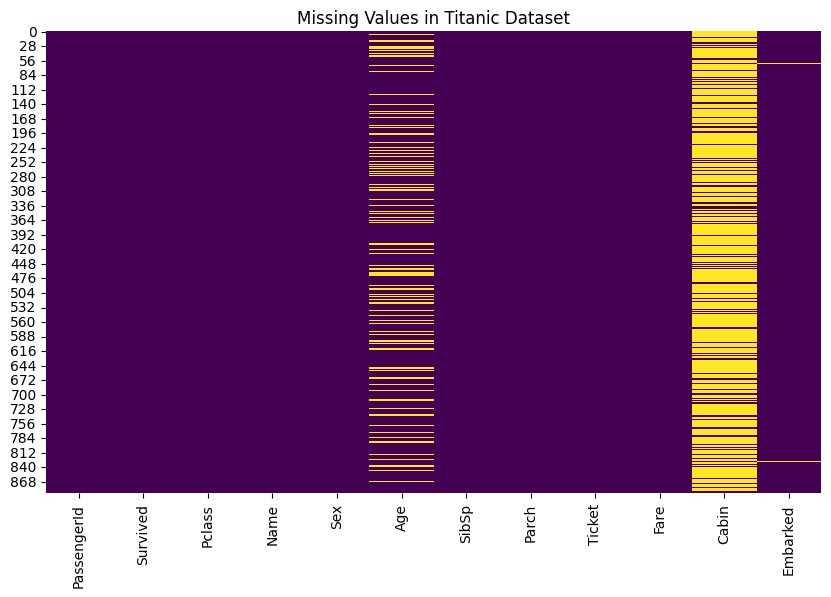

In [9]:
# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Titanic Dataset')
plt.show()

## Handle Categorical Value

In [10]:
# Check the data types of each column
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
# Perform one-hot encoding on 'Sex' and 'Embarked'
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)

# Display the updated dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True


In [12]:
# Label encoding is not strictly necessary for 'Pclass' since it's already numerical,
# but if you have other ordinal categorical data, you can use this approach.
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to 'Pclass' (if needed)
titanic_df['Pclass'] = label_encoder.fit_transform(titanic_df['Pclass'])

# Display the updated dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,2,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,2,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,2,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True


In [13]:
# Check the updated data types and values
titanic_df.info()
titanic_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Sex_male     891 non-null    bool   
 11  Embarked_Q   891 non-null    bool   
 12  Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(2), int64(5), object(3)
memory usage: 72.3+ KB


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,2,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,2,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,2,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True


In [14]:
# Extract the first letter of the 'Cabin' column (representing the deck)
titanic_df['Deck'] = titanic_df['Cabin'].str[0]

# Drop the original 'Cabin' column
titanic_df.drop('Cabin', axis=1, inplace=True)

# Check the updated dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,Deck
0,1,0,2,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True,NaN
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False,C
2,3,1,2,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True,NaN
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True,C
4,5,0,2,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True,NaN


## Scale the features

In [15]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Select numerical columns to scale
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass']

# Apply scaling to the selected columns
titanic_df[numerical_features] = scaler.fit_transform(titanic_df[numerical_features])

# Display the updated dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,Deck
0,1,0,0.827377,"Braund, Mr. Owen Harris",-0.530377,0.432793,-0.473674,A/5 21171,-0.502445,True,False,True,NaN
1,2,1,-1.566107,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.571831,0.432793,-0.473674,PC 17599,0.786845,False,False,False,C
2,3,1,0.827377,"Heikkinen, Miss. Laina",-0.254825,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,False,False,True,NaN
3,4,1,-1.566107,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.365167,0.432793,-0.473674,113803,0.420730,False,False,True,C
4,5,0,0.827377,"Allen, Mr. William Henry",0.365167,-0.474545,-0.473674,373450,-0.486337,True,False,True,NaN


In [16]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Select numerical columns to scale
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass']

# Apply scaling to the selected columns
titanic_df[numerical_features] = scaler.fit_transform(titanic_df[numerical_features])

# Display the updated dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,Deck
0,1,0,1.0,"Braund, Mr. Owen Harris",0.271174,0.125,0.0,A/5 21171,0.014151,True,False,True,NaN
1,2,1,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.472229,0.125,0.0,PC 17599,0.139136,False,False,False,C
2,3,1,1.0,"Heikkinen, Miss. Laina",0.321438,0.000,0.0,STON/O2. 3101282,0.015469,False,False,True,NaN
3,4,1,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.434531,0.125,0.0,113803,0.103644,False,False,True,C
4,5,0,1.0,"Allen, Mr. William Henry",0.434531,0.000,0.0,373450,0.015713,True,False,True,NaN


In [17]:
# Check the summary statistics of the scaled features
titanic_df[numerical_features].describe()

,Age,Fare,SibSp,Parch,Pclass
count,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.367921,0.062858,0.065376,0.063599,0.654321
std,0.182540,0.096995,0.137843,0.134343,0.418036
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.247612,0.015440,0.000000,0.000000,0.500000
50%,0.346569,0.028213,0.000000,0.000000,1.000000
75%,0.472229,0.060508,0.125000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


## Remove Outliers

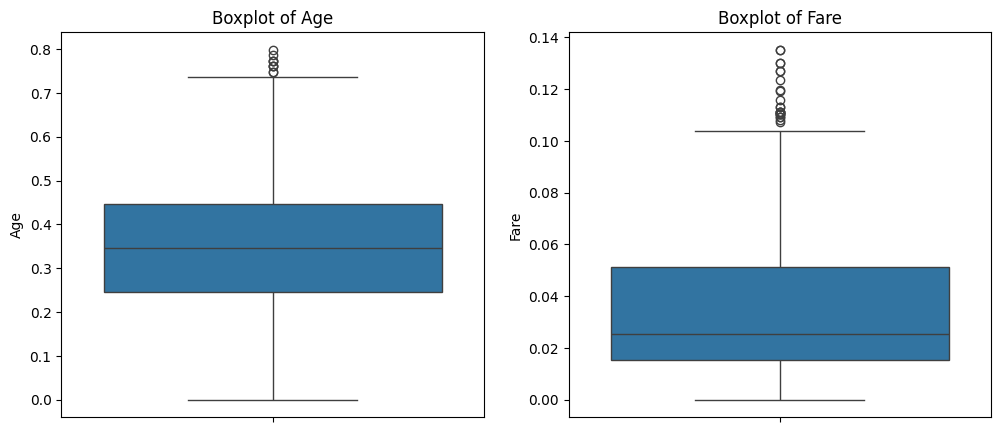

In [20]:
# Select numerical columns to check for outliers
numerical_columns = ['Age', 'Fare']  # Adjust as needed

# Visualizing outliers using boxplots
plt.figure(figsize=(12, 5))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(y=titanic_df[col])
    plt.title(f'Boxplot of {col}')
plt.show()

In [21]:
# Define a function to detect and remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


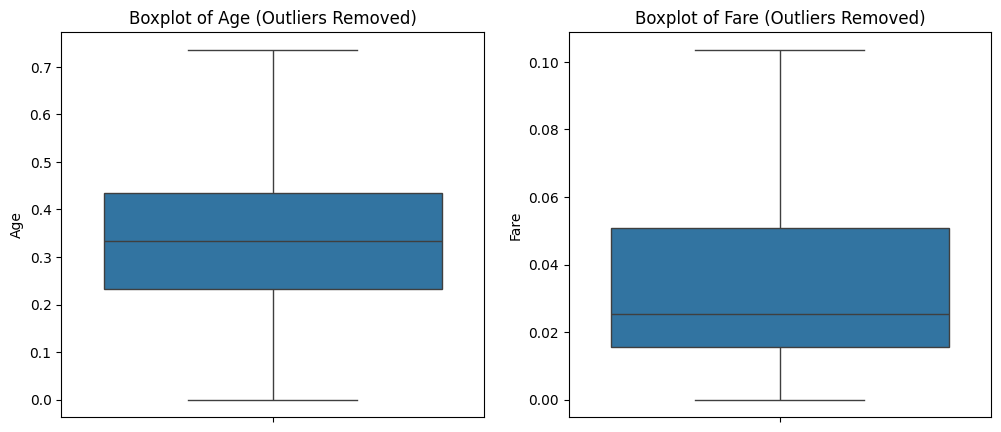

       PassengerId    Survived      Pclass         Age       SibSp  \
count   573.000000  573.000000  573.000000  573.000000  573.000000   
mean    449.577661    0.345550    0.745201    0.339985    0.062827   
std     264.953769    0.475963    0.345549    0.161225    0.122489   
min       1.000000    0.000000    0.000000    0.000000    0.000000   
25%     211.000000    0.000000    0.500000    0.233476    0.000000   
50%     444.000000    0.000000    1.000000    0.334004    0.000000   
75%     687.000000    1.000000    1.000000    0.434531    0.125000   
max     891.000000    1.000000    1.000000    0.736115    0.625000   

            Parch        Fare  
count  573.000000  573.000000  
mean     0.068354    0.033439  
std      0.144274    0.022767  
min      0.000000    0.000000  
25%      0.000000    0.015469  
50%      0.000000    0.025374  
75%      0.166667    0.050749  
max      1.000000    0.103644  


In [22]:
# Apply outlier removal
for col in numerical_columns:
    titanic_df = remove_outliers_iqr(titanic_df, col)

# Visualizing the data again after removing outliers
plt.figure(figsize=(12, 5))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(y=titanic_df[col])
    plt.title(f'Boxplot of {col} (Outliers Removed)')
plt.show()

# Display dataset summary after outlier removal
print(titanic_df.describe())

## Feature Selection

In [27]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import numpy as np

In [28]:
# Define target variable (adjust based on dataset)
target = 'Survived'
X = titanic_df.drop(columns=[target])
y = titanic_df[target]

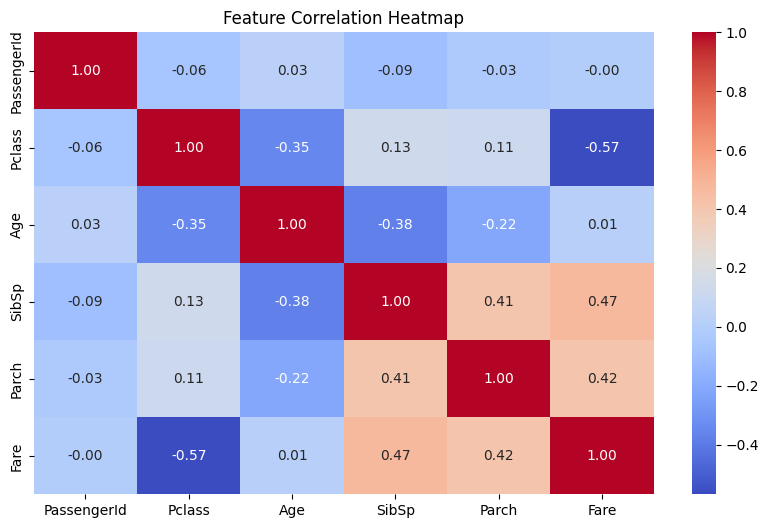

In [29]:
# Step 1: Check for High Correlation
plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

# Drop one of two highly correlated features (if any)
correlation_threshold = 0.8
corr_matrix = X.corr().abs()
upper_tri = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape)).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > correlation_threshold)]
X = X.drop(columns=to_drop)

In [30]:
# Step 2: Remove Low-Variance Features
selector = VarianceThreshold(threshold=0.1)  # Adjust the threshold as needed
X = X.loc[:, selector.fit(X).get_support()]

In [31]:
# Step 3: Mutual Information for Feature Importance
mi_scores = mutual_info_classif(X, y)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

print("Feature Importance based on Mutual Information:")
print(mi_df)


Feature Importance based on Mutual Information:
       Feature  MI Score
1       Pclass  0.059724
0  PassengerId  0.003810


In [32]:
# Step 4: Recursive Feature Elimination (RFE)
rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
rfe_selector.fit(X, y)

c:\Users\SHARMA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_rfe.py:300: UserWarning: Found n_features_to_select=5 > n_features=2. There will be no feature selection and all features will be kept.
  warnings.warn(


RFE(estimator=RandomForestClassifier(), n_features_to_select=5)

In [33]:
selected_features = X.columns[rfe_selector.support_]
print("Selected Features using RFE:", selected_features)

# Final dataset with selected features
X_selected = X[selected_features]

Selected Features using RFE: Index(['PassengerId', 'Pclass'], dtype='object')


## PCA

In [34]:
from sklearn.decomposition import PCA
# Standardize the data (PCA is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


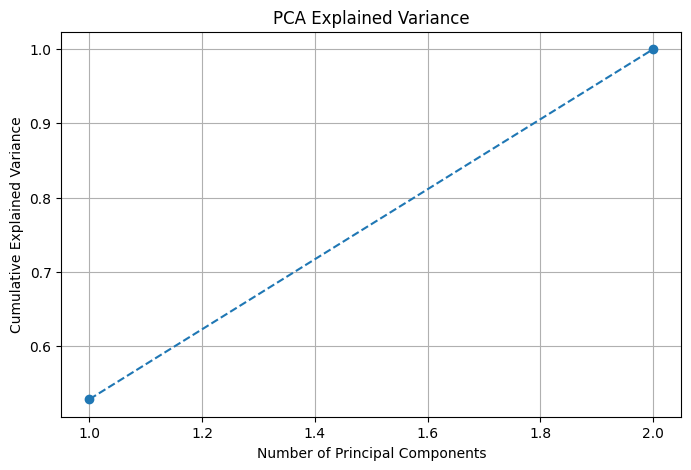

In [35]:
# Explained variance ratio plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

In [36]:
# Choose the number of components that explain at least 95% variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance >= 0.95) + 1  # Get the minimum number of components for 95% variance


In [37]:
print(f"Number of components chosen: {n_components}")

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_pca_selected = pca.fit_transform(X_scaled)

# Convert back to DataFrame
X_pca_df = pd.DataFrame(X_pca_selected, columns=[f'PC{i+1}' for i in range(n_components)])

# Display the transformed dataset
print(X_pca_df.head())

Number of components chosen: 2
        PC1       PC2
0  1.720065 -0.676349
1  1.714723 -0.671007
2 -0.336063 -2.716450
3  1.709381 -0.665664
4 -0.344076 -2.708436
